<a href="https://colab.research.google.com/github/aarmintia/Electronic-Product-Rating/blob/main/Electronic_Product_Data_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
products0 = pd.read_excel('/content/Onyx Data -DataDNA Dataset Challenge - Electronics Product Data Ratings - February 2024.xlsx', sheet_name = 'Dataset')
products = products0.copy()

In [ ]:
products.shape

(7299, 24)

In [ ]:
null_perc = products.isnull().sum()
null_perc

id                        0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend    1391
reviews.numHelpful     1486
reviews.rating          164
reviews.sourceURLs        0
reviews.text              5
reviews.title             4
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

To determine missing values of reviews.doRecommend column, determine the possibility of TRUE/FALSE using the reviews.title column. Copy reviews.text column if reviews.title is null

In [ ]:
products[products['reviews.title'].isnull()]

,id,brand,categories,colors,dateAdded,dateUpdated,dimension,imageURLs,keys,manufacturer,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
5426,AVpfVI9wilAPnD_xZxH-,WD,"Computers,Internal Hard Drives,Internal Drives...",NaN,2015-08-16T21:01:50Z,2018-06-05T12:48:22Z,4.0 in x 5.8 in x 1.0 in,https://i5.walmartimages.com/asr/92471d38-b293...,2tbred5400rpmsataiii35internalnashdd/b008jjlz7...,NaN,...,NaN,NaN,4.0,http://reviews.cdw.com/0058-en_us/2764463/revi...,I'm not sure what all i can say about a hard d...,NaN,FiyaFly,http://www.amazon.com/Red-2TB-Hard-Disk-Drive/...,7.180000e+11,1.32 lb
5439,AVpfVI9wilAPnD_xZxH-,WD,"Computers,Internal Hard Drives,Internal Drives...",NaN,2015-08-16T21:01:50Z,2018-06-05T12:48:22Z,4.0 in x 5.8 in x 1.0 in,https://i5.walmartimages.com/asr/92471d38-b293...,2tbred5400rpmsataiii35internalnashdd/b008jjlz7...,NaN,...,NaN,NaN,5.0,http://reviews.cdw.com/0058-en_us/2764463/revi...,I have some of these drives in my HP microserv...,NaN,Rob Annable,http://www.amazon.com/Red-2TB-Hard-Disk-Drive/...,7.180000e+11,1.32 lb
5450,AVpfVI9wilAPnD_xZxH-,WD,"Computers,Internal Hard Drives,Internal Drives...",NaN,2015-08-16T21:01:50Z,2018-06-05T12:48:22Z,4.0 in x 5.8 in x 1.0 in,https://i5.walmartimages.com/asr/92471d38-b293...,2tbred5400rpmsataiii35internalnashdd/b008jjlz7...,NaN,...,NaN,NaN,5.0,http://reviews.cdw.com/0058-en_us/2764463/revi...,"I love the WD Red line. I have used all sizes,...",NaN,ABoushard,http://www.amazon.com/Red-2TB-Hard-Disk-Drive/...,7.180000e+11,1.32 lb
5453,AVpfVI9wilAPnD_xZxH-,WD,"Computers,Internal Hard Drives,Internal Drives...",NaN,2015-08-16T21:01:50Z,2018-06-05T12:48:22Z,4.0 in x 5.8 in x 1.0 in,https://i5.walmartimages.com/asr/92471d38-b293...,2tbred5400rpmsataiii35internalnashdd/b008jjlz7...,NaN,...,NaN,NaN,5.0,http://reviews.cdw.com/0058-en_us/2764463/revi...,Have two of these for my MicroServer - no issu...,NaN,Nitroz,http://www.amazon.com/Red-2TB-Hard-Disk-Drive/...,7.180000e+11,1.32 lb


In [ ]:
products['reviews.title'] = products['reviews.title'].fillna(products['reviews.text'])

In [ ]:
products['reviews.title'].isnull().sum()

0

In [ ]:
products['Recommended'] = products['reviews.title'].apply(lambda x:sia.polarity_scores(x)['compound'] >= 0)
products.head(5)

,id,brand,categories,colors,dateAdded,dateUpdated,dimension,imageURLs,keys,manufacturer,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight,Recommended
0,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,...,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,True
1,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,...,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,True
2,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,...,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,True
3,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,...,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,True
4,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,...,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,True


In [ ]:
comparison = products['reviews.doRecommend'].isnull()
print(products.loc[comparison,['Recommended', 'reviews.title']])

      Recommended                                      reviews.title
476          True                                 love this keyboard
487          True                                         Nice Cover
491          True                   Great Keyboard for Surface Pro 4
495          True  Nice keyboard, should be standard with the Sur...
496          True                         Worthy Upgrade for the SP3
...           ...                                                ...
6287         True                              Best Remote Available
6309         True                           logitech Ultimate remote
7292         True                                Nice, modern design
7293        False                                        Poor design
7294         True                                       Great Remote

[1391 rows x 2 columns]


In [ ]:
products['reviews.doRecommend'] = products['reviews.doRecommend'].fillna(products['Recommended'])

In [ ]:
products.isnull().sum()

id                        0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend       0
reviews.numHelpful     1486
reviews.rating          164
reviews.sourceURLs        0
reviews.text              5
reviews.title             0
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
Recommended               0
dtype: int64

For null values in reviews.rating, put 1 if FALSE in reviews.doRecommend and 5 if TRUE

In [ ]:
products['Rating'] = products['reviews.doRecommend'].apply(lambda x:5 if x else 1)
print(products[['reviews.doRecommend','reviews.rating','Rating']])

     reviews.doRecommend  reviews.rating  Rating
0                    1.0             5.0       5
1                    1.0             4.0       5
2                    1.0             4.0       5
3                    1.0             5.0       5
4                    1.0             5.0       5
...                  ...             ...     ...
7294                True             4.0       5
7295                 1.0             4.0       5
7296                 1.0             4.0       5
7297                 1.0             5.0       5
7298                 1.0             4.0       5

[7299 rows x 3 columns]


In [ ]:
compare = products['reviews.rating'] == products['Rating']
print(products.loc[~compare,['reviews.rating','Rating']].head(25))

    reviews.rating  Rating
1              4.0       5
2              4.0       5
6              4.0       5
7              3.0       1
8              4.0       5
11             4.0       1
12             4.0       5
13             4.0       5
14             4.0       5
18             4.0       5
24             4.0       5
27             4.0       5
29             4.0       5
31             4.0       5
39             3.0       5
40             4.0       5
44             4.0       5
45             4.0       5
48             4.0       5
52             3.0       1
54             2.0       1
57             4.0       5
58             4.0       5
59             4.0       5
65             4.0       5


In [ ]:
products['reviews.rating'] = products['reviews.rating'].fillna(products['Rating'])

In [ ]:
products.isnull().sum()

id                        0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend       0
reviews.numHelpful     1486
reviews.rating            0
reviews.sourceURLs        0
reviews.text              5
reviews.title             0
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
Recommended               0
Rating                    0
dtype: int64

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7299 non-null   object 
 1   brand                7299 non-null   object 
 2   categories           7299 non-null   object 
 3   colors               5280 non-null   object 
 4   dateAdded            7299 non-null   object 
 5   dateUpdated          7299 non-null   object 
 6   dimension            6090 non-null   object 
 7   imageURLs            7299 non-null   object 
 8   keys                 7299 non-null   object 
 9   manufacturer         4632 non-null   object 
 10  manufacturerNumber   7299 non-null   object 
 11  name                 7299 non-null   object 
 12  reviews.date         7238 non-null   object 
 13  reviews.dateSeen     7299 non-null   object 
 14  reviews.doRecommend  7299 non-null   object 
 15  reviews.numHelpful   5813 non-null   f

In [ ]:
rating_recommendation_relation = products.groupby('reviews.rating')['reviews.doRecommend'].value_counts().unstack()

print(rating_recommendation_relation)


reviews.doRecommend  0.0   1.0
reviews.rating                
1.0                  247    81
2.0                  159    63
3.0                  210   230
4.0                   45  1618
5.0                   20  4626


In [ ]:
rating_recommendation_relation = products.groupby('reviews.rating')['reviews.doRecommend'].value_counts(normalize=True).unstack()

print(rating_recommendation_relation)

rating_recommendation_relation.to_excel('proportion.xlsx', index=False)

reviews.doRecommend       0.0       1.0
reviews.rating                         
1.0                  0.753049  0.246951
2.0                  0.716216  0.283784
3.0                  0.477273  0.522727
4.0                  0.027060  0.972940
5.0                  0.004305  0.995695


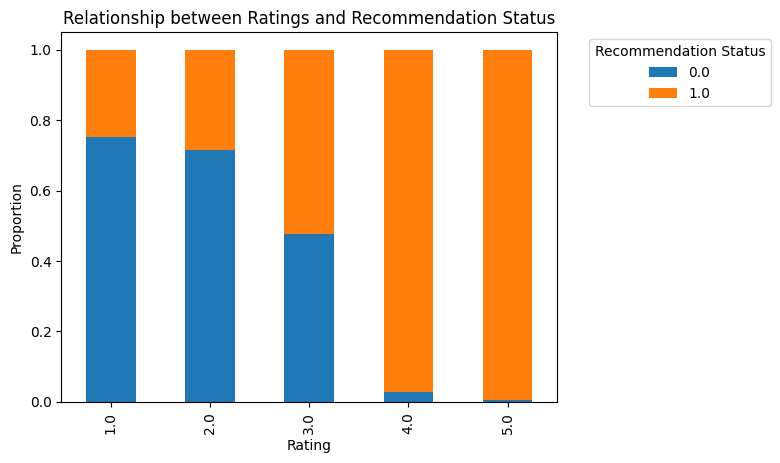

In [ ]:
rating_recommendation_relation = products.groupby('reviews.rating')['reviews.doRecommend'].value_counts(normalize=True).unstack()

# Plot the result
rating_recommendation_relation.plot(kind='bar', stacked=True)
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.title('Relationship between Ratings and Recommendation Status')
plt.legend(title='Recommendation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


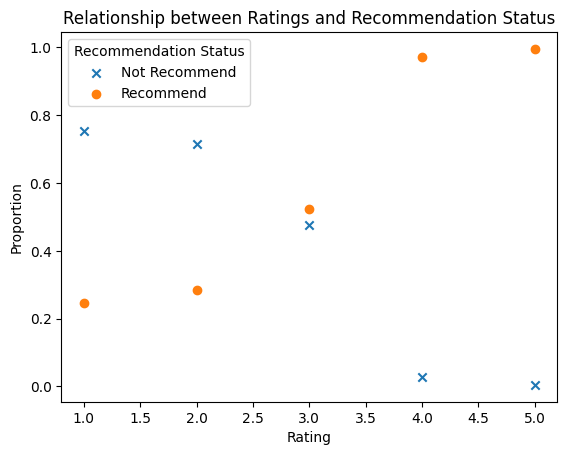

In [ ]:
products['reviews.doRecommend'] = products['reviews.doRecommend'].astype(bool)

rating_recommendation_relation = products.groupby('reviews.rating')['reviews.doRecommend'].value_counts(normalize=True).unstack()

plt.scatter(rating_recommendation_relation.index, rating_recommendation_relation[False], label='Not Recommend', marker='x')
plt.scatter(rating_recommendation_relation.index, rating_recommendation_relation[True], label='Recommend', marker='o')

plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.title('Relationship between Ratings and Recommendation Status')
plt.legend(title='Recommendation Status')
plt.show()


# 2. Brands with the highest average customer satisfaction across different product categories:

In [ ]:
average_ratings = products.groupby(['brand', 'categories'])['reviews.rating'].mean()

highest_satisfaction = average_ratings.idxmax()

print(f"The brand with the highest average satisfaction is {highest_satisfaction[0]} in the category {highest_satisfaction[1]}")


The brand with the highest average satisfaction is House of Marley in the category Headphones,Electronics,Over-Ear Headphones,Audio,Over-Ear & On-Ear Headphones


The brand with the highest average satisfaction is House of Marley in the category Headphones,Electronics,Over-Ear Headphones,Audio,Over-Ear & On-Ear Headphones


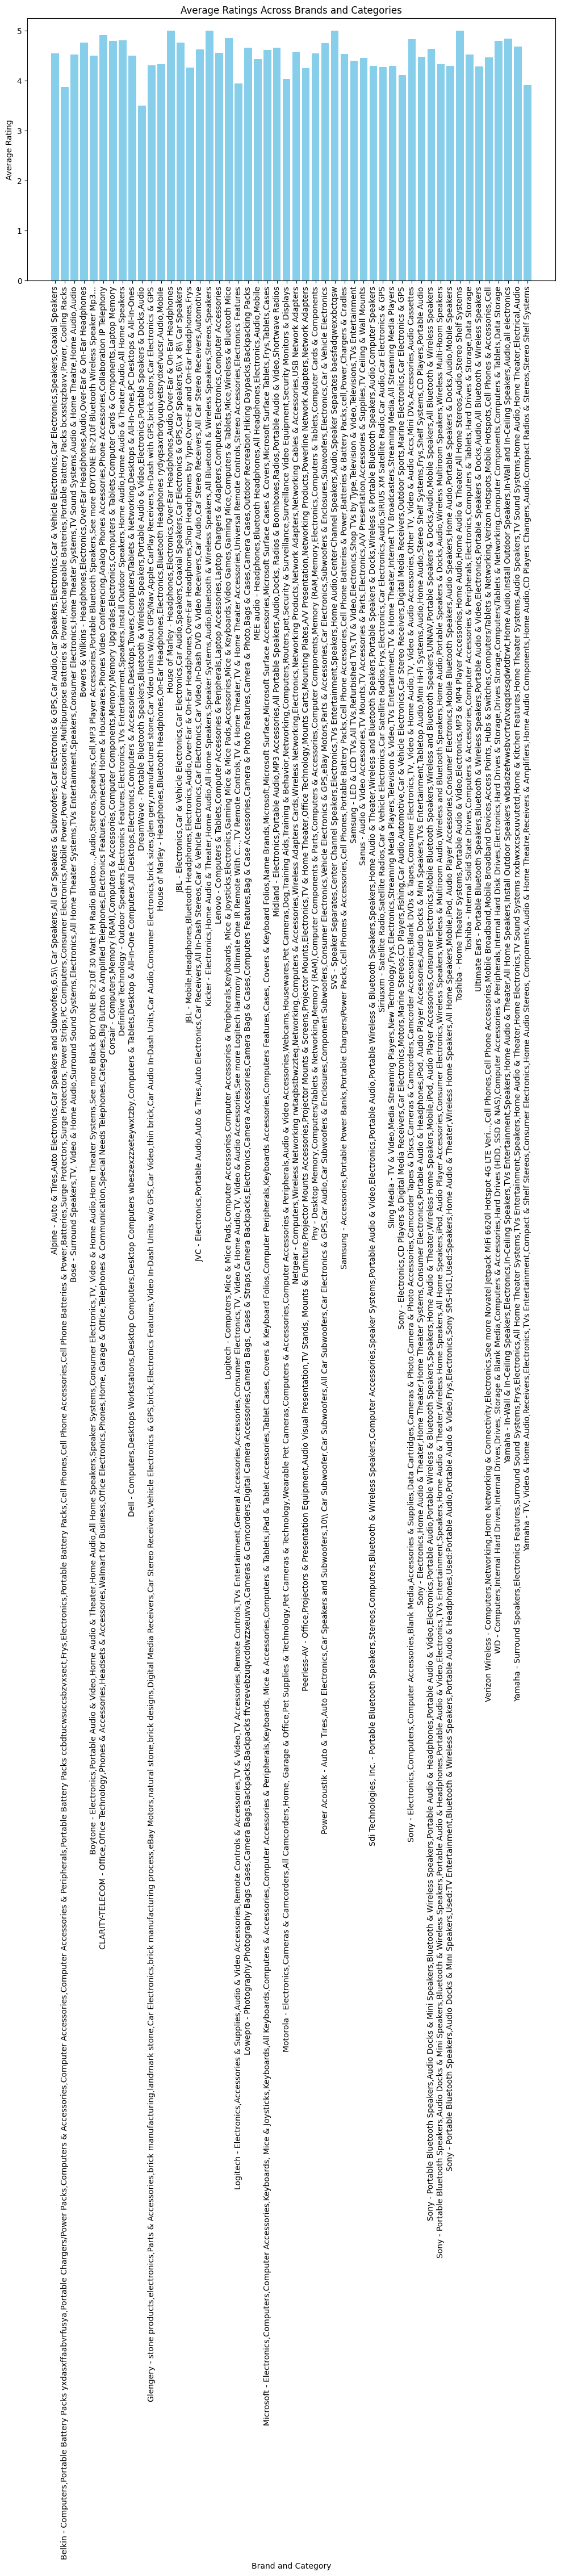

In [ ]:
average_ratings = products.groupby(['brand', 'categories'])['reviews.rating'].mean().reset_index()

highest_satisfaction = average_ratings.loc[average_ratings['reviews.rating'].idxmax()]

print(f"The brand with the highest average satisfaction is {highest_satisfaction['brand']} in the category {highest_satisfaction['categories']}")

plt.figure(figsize=(12, 6))
plt.bar(average_ratings.index, average_ratings['reviews.rating'], color='skyblue')
plt.xlabel('Brand and Category')
plt.ylabel('Average Rating')
plt.title('Average Ratings Across Brands and Categories')
plt.xticks(average_ratings.index, average_ratings['brand'] + ' - ' + average_ratings['categories'], rotation=90)
plt.show()


# 3. Influence of product features on reviews and ratings:

<ipython-input-205-7e0308e79139>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


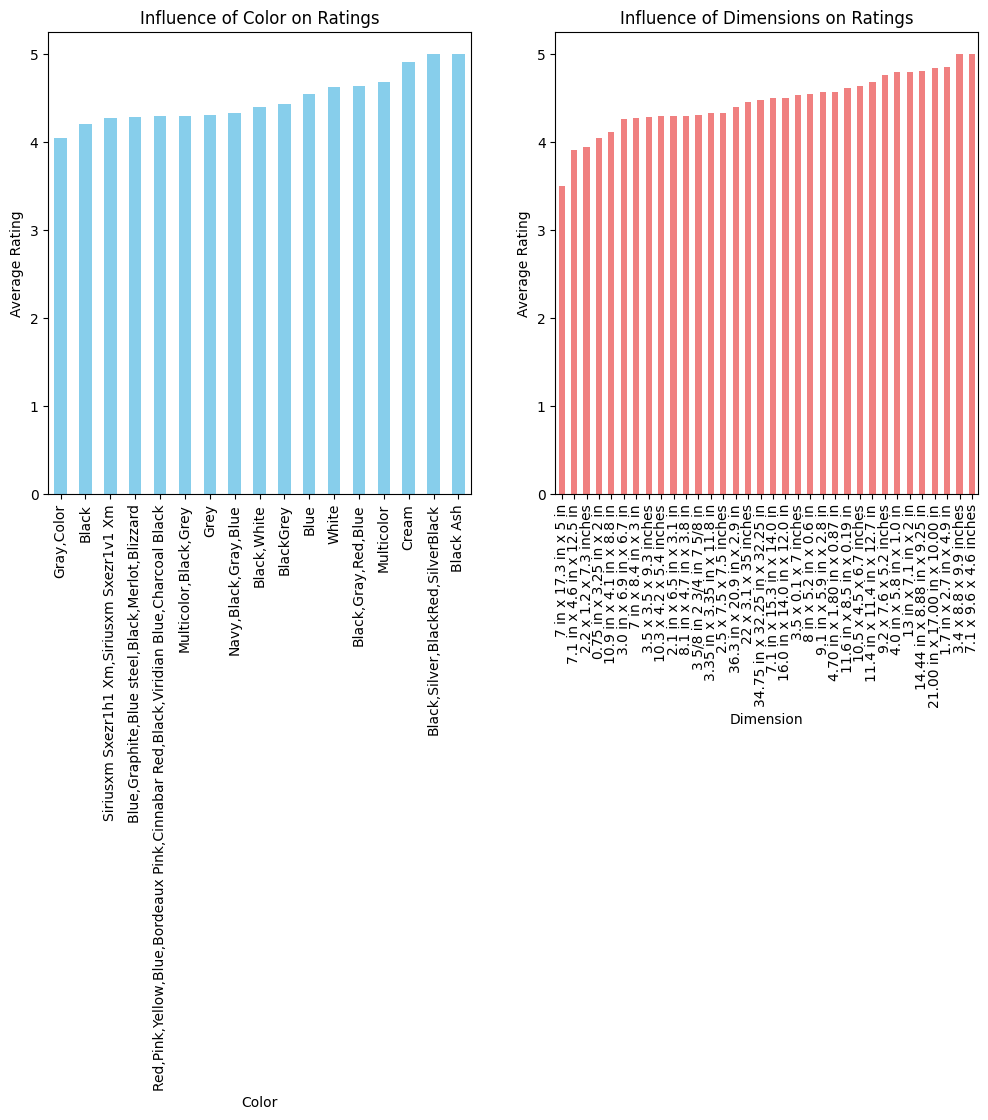

In [ ]:
color_influence = products.groupby('colors')['reviews.rating'].mean()

dimension_influence = products.groupby('dimension')['reviews.rating'].mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
color_influence.sort_values().plot(kind='bar', color='skyblue')
plt.title('Influence of Color on Ratings')
plt.xlabel('Color')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
dimension_influence.sort_values().plot(kind='bar', color='lightcoral')
plt.title('Influence of Dimensions on Ratings')
plt.xlabel('Dimension')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()


In [ ]:
products['colors'] = products['colors'].fillna('Not Specified')
products['dimension'] = products['dimension'].fillna('Not Specified')

In [ ]:
products.isnull().sum()

id                        0
brand                     0
categories                0
colors                    0
dateAdded                 0
dateUpdated               0
dimension                 0
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend       0
reviews.numHelpful     1486
reviews.rating            0
reviews.sourceURLs        0
reviews.text              5
reviews.title             0
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
Recommended               0
Rating                    0
dtype: int64

<ipython-input-208-7e0308e79139>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


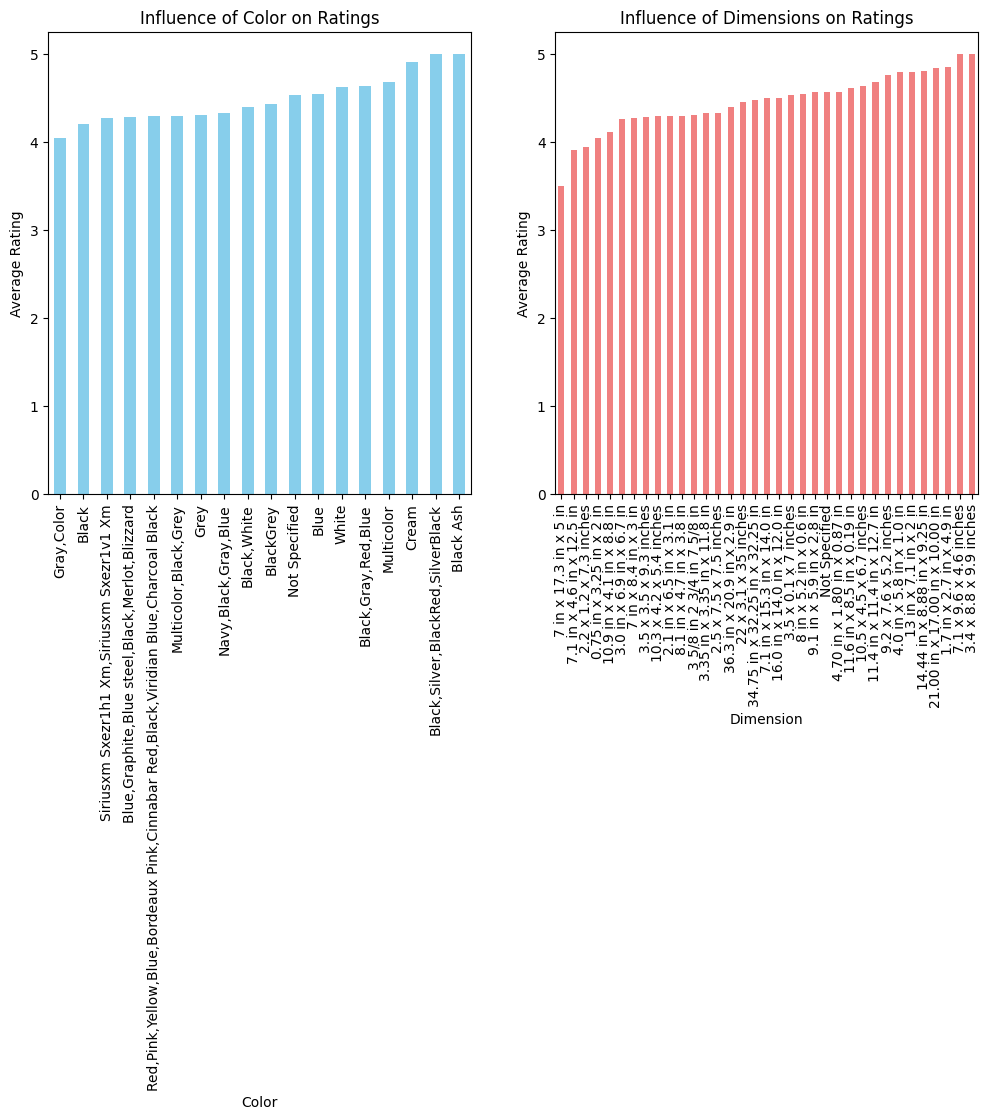

In [ ]:
color_influence = products.groupby('colors')['reviews.rating'].mean()

dimension_influence = products.groupby('dimension')['reviews.rating'].mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
color_influence.sort_values().plot(kind='bar', color='skyblue')
plt.title('Influence of Color on Ratings')
plt.xlabel('Color')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
dimension_influence.sort_values().plot(kind='bar', color='lightcoral')
plt.title('Influence of Dimensions on Ratings')
plt.xlabel('Dimension')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()


In [ ]:
products.to_excel('products_cleaned.xlsx', index=False)